In [47]:
# Import all the required liabrary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.feature_selection import RFE

In [24]:
#Load HR Data Set
df = pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [25]:
#check the shape of data
df.shape

(614, 13)

In [26]:
#Check if any missing value present in data
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [28]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [29]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [30]:
categorical_col =[]
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique())<=50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("=================================")
        

Gender : ['Male' 'Female' nan]
Married : ['No' 'Yes' nan]
Dependents : ['0' '1' '2' '3+' nan]
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes' nan]
Property_Area : ['Urban' 'Rural' 'Semiurban']
Loan_Status : ['Y' 'N']


In [31]:
df['Loan_Status']=df.Loan_Status.astype('category').cat.codes

In [32]:
df.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

ApplicantIncome         AxesSubplot(0.125,0.536818;0.227941x0.343182)
CoapplicantIncome    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
LoanAmount           AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Loan_Amount_Term           AxesSubplot(0.125,0.125;0.227941x0.343182)
Credit_History          AxesSubplot(0.398529,0.125;0.227941x0.343182)
Loan_Status             AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

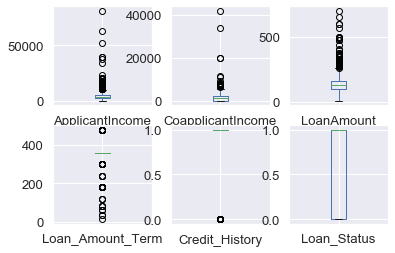

In [44]:
#check outliers
df.plot(kind='box',subplots=True,layout=(2,3))

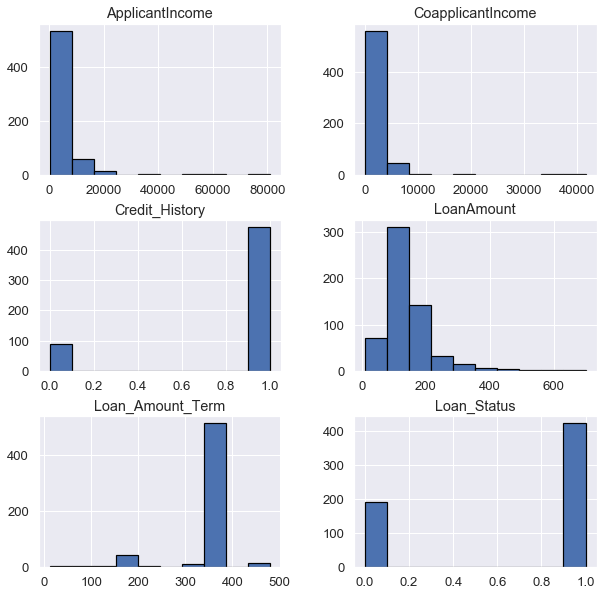

In [33]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(10, 10));

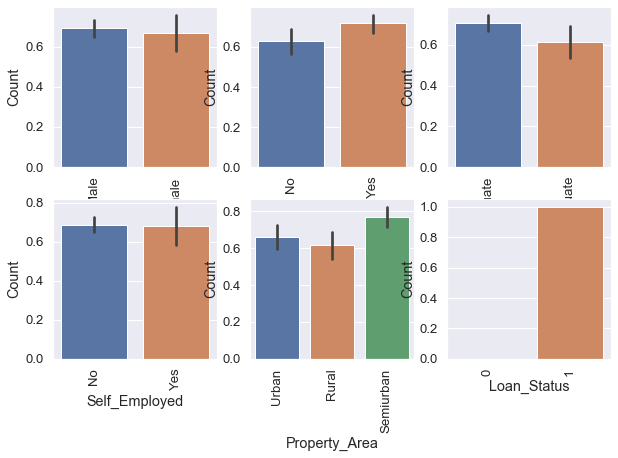

In [45]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 10))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Loan_Status', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Count')
    plt.xlabel(f'{column}')

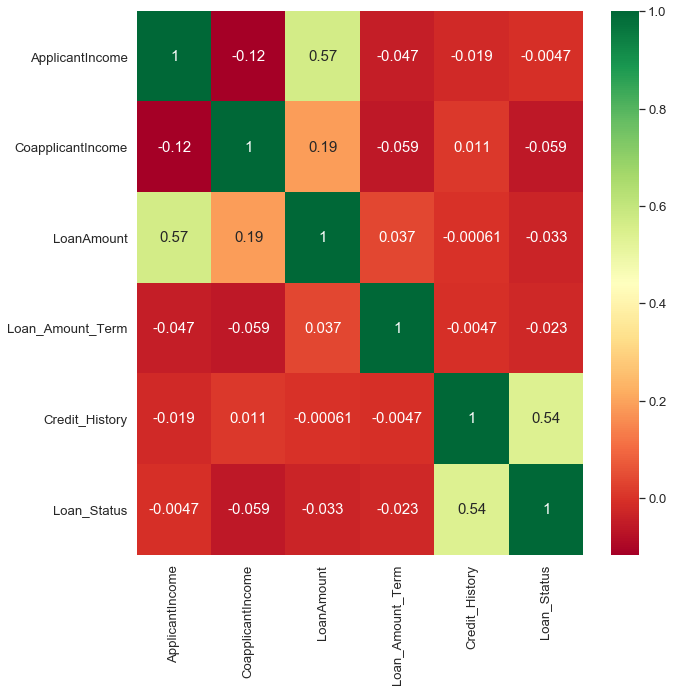

In [46]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [38]:
#Check if any missing value present in data
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status             int8
dtype: object

In [40]:
#Replacing Null Values in Numerical columns using Median
median1 = df['LoanAmount'].median()
median2 = df['Loan_Amount_Term'].median()
median3 = df['Credit_History'].median()

df['LoanAmount'].replace(np.nan,median1,inplace=True)
df['Loan_Amount_Term'].replace(np.nan,median2,inplace=True)
df['Credit_History'].replace(np.nan,median3,inplace=True)

In [41]:
#Replacing Null Values in Categorical columns using Mode
mode1 = df['Gender'].mode().values[0]
mode2 = df['Married'].mode().values[0]
mode3 = df['Dependents'].mode().values[0]
mode4 = df['Self_Employed'].mode().values[0]

df['Gender'].replace(np.nan,mode1,inplace=True)
df['Married'].replace(np.nan,mode2,inplace=True)
df['Dependents'].replace(np.nan,mode3,inplace=True)
df['Self_Employed'].replace(np.nan,mode4,inplace=True)

In [42]:
#Check if any missing value present in data
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [48]:
std_scale = StandardScaler()
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
df['ApplicantIncome'] = std_scale.fit_transform(df[['ApplicantIncome']])
df['CoapplicantIncome'] = std_scale.fit_transform(df[['CoapplicantIncome']])
df['LoanAmount'] = std_scale.fit_transform(df[['LoanAmount']])
df['Loan_Amount_Term'] = std_scale.fit_transform(df[['Loan_Amount_Term']])

In [50]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.072991,-0.554487,-0.211241,0.273231,1.0,Urban,1
1,Male,Yes,1,Graduate,No,-0.134412,-0.038732,-0.211241,0.273231,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,-0.393747,-0.554487,-0.948996,0.273231,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,-0.462062,0.251980,-0.306435,0.273231,1.0,Urban,1
4,Male,No,0,Graduate,No,0.097728,-0.554487,-0.056551,0.273231,1.0,Urban,1


In [51]:
dummies = pd.get_dummies(df[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']])
dummies.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [52]:
columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
df = pd.concat([df,dummies],axis=1)
df.drop(columns,axis=1,inplace=True)

In [53]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072991,-0.554487,-0.211241,0.273231,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,-0.393747,-0.554487,-0.948996,0.273231,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,-0.462062,0.251980,-0.306435,0.273231,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,0.097728,-0.554487,-0.056551,0.273231,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [54]:
x = df.drop('Loan_Status', axis=1)
y = df.Loan_Status

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=44)

In [62]:
model = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=7)]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('accuaracy score of',accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuaracy score of 0.8709677419354839
[[ 8  8]
 [ 0 46]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.85      1.00      0.92        46

    accuracy                           0.87        62
   macro avg       0.93      0.75      0.79        62
weighted avg       0.89      0.87      0.85        62



accuaracy score of 0.8387096774193549
[[ 8  8]
 [ 2 44]]
              precision    recall  f1-score   support

           0       0.80      0.50      0.62        16
           1       0.85      0.96      0.90        46

    accuracy                           0.84        62
   macro avg       0.82      0.73      0.76        62
weighted avg       0.83      0.84      0.83        62



accuaracy score of 0.6935483870967742
[[ 9  7]
 [12 34]]
              precision    recall  f1-score   support

           0       0.43      0.56      0.49        16
           1       0.83      0.74      0.78        46

    acc

# Model Validation¶

In [63]:
clf = LogisticRegression()

scores = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
scores

array([0.81300813, 0.77235772, 0.7804878 , 0.85365854, 0.81967213])

In [64]:
x_train.shape

(552, 20)

# Hyperparameter Tuning Using Grid Search Cross-Validation
A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation.

In [65]:

#specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 19))}]


#grid search
#specify model
lm = LogisticRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm)             

#call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,param_grid = hyper_params,scoring= 'accuracy',cv = 5,verbose = 1,return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)  

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   18.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RFE(estimator=LogisticRegression(C=1.0,
                                                        class_weight=None,
                                                        dual=False,
                                                        fit_intercept=True,
                                                        intercept_scaling=1,
                                                        l1_ratio=None,
                                                        max_iter=100,
                                                        multi_class='auto',
                                                        n_jobs=None,
                                                        penalty='l2',
                                                        random_state=None,
                                                        solver='lbfgs',
                                                        tol=0.0001, verbose=0,
                       

In [66]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.322657,0.062193,0.003076,1.559331e-03,1,{'n_features_to_select': 1},0.801802,0.792793,0.818182,0.8,...,0.802555,0.008404,15,0.802721,0.804989,0.798643,0.803167,0.803167,0.802537,0.002098
1,0.296650,0.039709,0.003411,2.250398e-03,2,{'n_features_to_select': 2},0.801802,0.792793,0.818182,0.8,...,0.802555,0.008404,15,0.802721,0.804989,0.798643,0.803167,0.803167,0.802537,0.002098
2,0.360256,0.156894,0.001371,1.908058e-03,3,{'n_features_to_select': 3},0.801802,0.792793,0.818182,0.8,...,0.802555,0.008404,15,0.802721,0.804989,0.798643,0.803167,0.803167,0.802537,0.002098
3,0.243861,0.008961,0.003704,2.093077e-03,4,{'n_features_to_select': 4},0.801802,0.792793,0.818182,0.8,...,0.802555,0.008404,15,0.802721,0.804989,0.798643,0.803167,0.803167,0.802537,0.002098
4,0.229830,0.013427,0.003300,1.661526e-03,5,{'n_features_to_select': 5},0.810811,0.792793,0.818182,0.8,...,0.804357,0.008994,4,0.807256,0.804989,0.798643,0.803167,0.803167,0.803444,0.002833
5,0.238777,0.013868,0.002600,1.744254e-03,6,{'n_features_to_select': 6},0.810811,0.792793,0.818182,0.8,...,0.804357,0.008994,4,0.807256,0.804989,0.798643,0.803167,0.803167,0.803444,0.002833
6,0.302778,0.162747,0.003747,2.150667e-03,7,{'n_features_to_select': 7},0.810811,0.792793,0.818182,0.8,...,0.804357,0.008994,4,0.807256,0.804989,0.798643,0.803167,0.809955,0.804802,0.003827
7,0.193663,0.009797,0.001812,1.848746e-03,8,{'n_features_to_select': 8},0.810811,0.792793,0.818182,0.8,...,0.804357,0.008994,4,0.807256,0.804989,0.803167,0.803167,0.809955,0.805707,0.002602
8,0.191340,0.017490,0.004002,3.234067e-07,9,{'n_features_to_select': 9},0.810811,0.774775,0.818182,0.8,...,0.802572,0.015056,8,0.807256,0.800454,0.803167,0.807692,0.812217,0.806157,0.004044
9,0.167855,0.005348,0.002415,1.972059e-03,10,{'n_features_to_select': 10},0.810811,0.774775,0.818182,0.8,...,0.802572,0.015056,8,0.807256,0.800454,0.803167,0.807692,0.812217,0.806157,0.004044


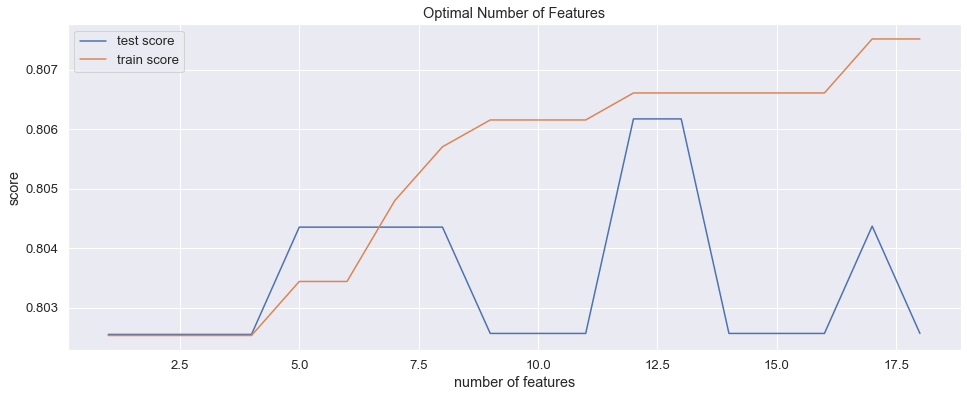

In [67]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('score')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# Now we can choose the optimal value of number of features and build a final model.

In [70]:
# final model
n_features_optimal = 13

lm =  LogisticRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(x_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(x_test)
score = accuracy_score(y_test,y_pred)
print(score)

0.8709677419354839


# Save the model using Pickle¶

In [71]:
# Save the model using pickle
import pickle

filename = "pickleLRfile.pkl"
pickle.dump(rfe, open(filename, 'wb'))
